### Chefkoch link data - exploratory analysis

This is a first attempt to look at some of the data resulting from the chefkoch link data (without getting fancy about graph databases). 

The first major result is that data quality is poor - suggesting I need to revisit the regexes.

In [37]:
# Import libraries and define graphics preferences
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Read data
df = pd.read_csv("/Users/Leon/Documents/02_Research_Learning/Research/Recipes/03_Data/link_data.csv",
                index_col=0)

In [39]:
# Fix data formats
df['activationdate'] = pd.to_datetime(df['activationdate']) # Well that was easy!
df['difficulty'] = df['difficulty'].astype('category')

# Fix data format for preparation time
df['preptime'] = df['preptime'].astype('string')
df['prep_mins'] = df['preptime'].apply(lambda x: x.replace(" min.", "")).astype('float64')

# Fix data format for strings
df['subtitle'] = df['subtitle'].astype('str') # These aren't working (for obscure reasons)
df['title'] = df['title'].astype('str')
# df.dtypes

# Define additional variable for yearmonth (for plotting)
df['yearmonth'] = df['activationdate'].map(lambda x: x.year*1000 + x.month)

In [40]:
df.columns

Index([u'activationdate', u'category', u'category_list_page', u'difficulty',
       u'preptime', u'subtitle', u'title', u'url', u'votes_avg', u'votes_n',
       u'prep_mins', u'yearmonth'],
      dtype='object')

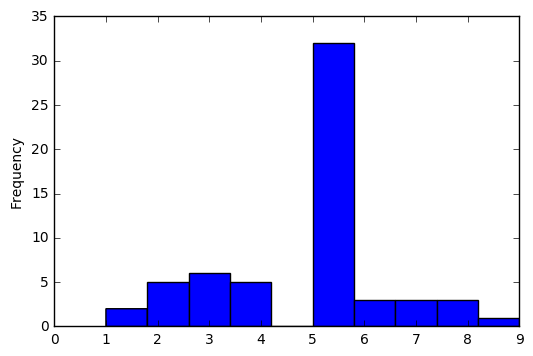

In [41]:
df['votes_avg'].plot.hist()

In [42]:
df[df['votes_avg']>5]

,activationdate,category,category_list_page,difficulty,preptime,subtitle,title,url,votes_avg,votes_n,prep_mins,yearmonth
731571175843661,2007-06-04,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,normal,60 min.,Pflaumen (entsteint) im Entsafter 2 Stunden ko...,Pflaumenlikör,www.chefkoch.de/rezepte/731571175843661/Pflaum...,7,40,60.0,2007006
192111081587419,2004-10-04,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,simpel,30 min.,"Brombeeren, Rotwein, Zucker, Vanillestange und...",Brombeerlikör gekocht,www.chefkoch.de/rezepte/192111081587419/Brombe...,6,151,30.0,2004010
1303271235391801,2009-02-23,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,simpel,30 min.,schmeckt wie flüssiges Marzipan,Engelchenlikör,www.chefkoch.de/rezepte/1303271235391801/Engel...,9,345,30.0,2009002
269951103727949,2004-12-22,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,simpel,30 min.,Die Holunderblüten am besten nach einer Schönw...,Erfrischender Holunderblütenlikör,www.chefkoch.de/rezepte/269951103727949/Erfris...,8,216,30.0,2004012
1048481209735028,2008-03-05,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,simpel,20 min.,diesmal heiß angesetzt,Erdbeerlikör,www.chefkoch.de/rezepte/1048481209735028/Erdbe...,6,33,20.0,2008003
510361146660274,2006-04-05,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,normal,30 min.,"Zucker und Wasser kochen, bis die Flüssigkeit ...",Himbeer - Limes,www.chefkoch.de/rezepte/510361146660274/Himbee...,6,83,30.0,2006004
51231018085747,2002-08-05,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,simpel,20 min.,Von 3 Limetten die Schale abreiben. 100 ml Saf...,Caipirinha-Bowle,www.chefkoch.de/rezepte/51231018085747/Caipiri...,8,844,20.0,2002008
1393141244283554,2009-07-06,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,simpel,10 min.,"Die Dosenfrüchte abtropfen lassen, der Saft ka...",Titanic Bowle,www.chefkoch.de/rezepte/1393141244283554/Titan...,7,25,10.0,2009007
1352881240037873,2009-04-18,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,simpel,5 min.,alkoholfreier Cocktail - erfrischend und super...,Ipanema,www.chefkoch.de/rezepte/1352881240037873/Ipane...,8,73,5.0,2009004
379121124223711,2005-08-17,Getraenke,www.chefkoch.de/rs/s0g102/Getraenke.html,simpel,20 min.,Ein Sommergetränk für Freunde von Obst,Paradies - Bowle,www.chefkoch.de/rezepte/379121124223711/Paradi...,7,25,20.0,2005008
